

```
# This is formatted as code
```

# Your name: Jerry Gehrung
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [121]:
# import packages 
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Data File Reading Section
## Write code to read in data from external sources here

In [142]:
#read datasets
data = pd.read_csv('data.csv', encoding = 'latin1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [143]:
# Your code for this section here ...
data.describe()
data.shape
data.count()
data.isnull().sum()
data.info()
data.head()
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [144]:
# Cleaning up the data

#dropping columns that aren't required
data.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis = 1, inplace = True)

# dropping rows where no date is available
data.dropna(subset = ['date'], inplace = True)

In [145]:
# displaying final columns (data.columns)
data.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [146]:
# ... Your code here
types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }
data.type = data.type.replace(types)

In [147]:
# Display top 10 records after codification of 'types'
data.type.head(10)

0    RRO
1      I
2    RRO
3    RRO
4      I
5    RRO
6    RRO
7      I
8    RRO
9      I
Name: type, dtype: object

### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [148]:
data.date = pd.to_datetime(data.date)
data.year = data.date.dt.year
data.year.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


0    1990
1    1990
2    1990
3    1990
4    1990
Name: date, dtype: int64

### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [149]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset

COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data[COLS] = imp_mean.fit_transform(data[COLS])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     435735 non-null  object        
 1   location  435735 non-null  object        
 2   type      435735 non-null  object        
 3   so2       435735 non-null  float64       
 4   no2       435735 non-null  float64       
 5   rspm      435735 non-null  float64       
 6   spm       435735 non-null  float64       
 7   pm2_5     435735 non-null  float64       
 8   date      435735 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 33.2+ MB


## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

In [150]:
def median_values(index):
    median_state = data.groupby('state')[index].median().sort_values()
    plt.bar(median_state.index, median_state)
    plt.title(f'Median {index} by State')
    plt.xticks(rotation = 90)
    print(median_state)
    return plt.show()

state
Nagaland                 2.000000
Mizoram                  2.000000
Meghalaya                2.000000
Arunachal Pradesh        2.500000
Himachal Pradesh         3.000000
Kerala                   4.200000
Telangana                5.000000
Odisha                   5.000000
Jammu & Kashmir          5.000000
Andhra Pradesh           5.000000
Goa                      6.000000
Rajasthan                6.300000
Delhi                    6.300000
Assam                    6.500000
Puducherry               7.266667
Daman & Diu              7.600000
Chandigarh               7.950000
West Bengal              8.000000
Dadra & Nagar Haveli     8.400000
Karnataka               10.000000
Uttar Pradesh           10.000000
Tamil Nadu              10.000000
Punjab                  10.300000
Manipur                 10.829428
Bihar                   10.829428
Haryana                 10.829428
Madhya Pradesh          10.829428
Chhattisgarh            12.500000
Maharashtra             13.000000
Gujarat 

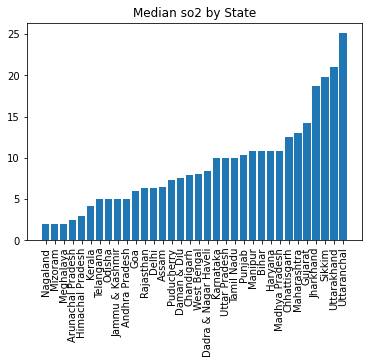

In [151]:
median_values('so2')

### no2 status

state
Arunachal Pradesh        5.000000
Mizoram                  5.000000
Nagaland                 7.000000
Meghalaya               10.000000
Goa                     11.600000
Puducherry              13.000000
Jammu & Kashmir         13.000000
Himachal Pradesh        13.900000
Kerala                  14.000000
Assam                   14.000000
Odisha                  16.000000
Daman & Diu             17.600000
Chandigarh              18.000000
Dadra & Nagar Haveli    18.000000
Madhya Pradesh          19.200000
Manipur                 19.800000
Andhra Pradesh          20.000000
Tamil Nadu              21.000000
Karnataka               21.200000
Chhattisgarh            21.500000
Telangana               22.000000
Haryana                 22.750000
Gujarat                 23.000000
Uttarakhand             25.809659
Rajasthan               26.000000
Sikkim                  26.800000
Uttar Pradesh           27.000000
Uttaranchal             27.500000
Punjab                  28.300000
Maharash

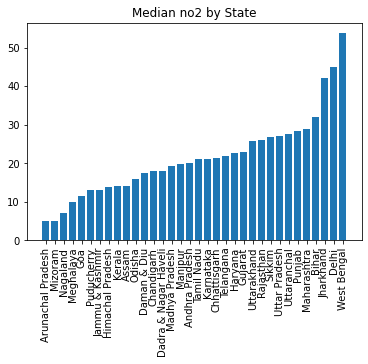

In [152]:
median_values('no2')

### rspm status

state
Sikkim                   32.000000
Mizoram                  40.000000
Puducherry               46.000000
Kerala                   49.000000
Goa                      56.000000
Meghalaya                57.000000
Tamil Nadu               59.000000
Manipur                  61.000000
Karnataka                63.000000
Arunachal Pradesh        74.500000
Andhra Pradesh           76.000000
Assam                    77.000000
Nagaland                 78.000000
Telangana                80.000000
Odisha                   81.000000
Himachal Pradesh         90.000000
Chandigarh               90.000000
Dadra & Nagar Haveli     91.000000
Gujarat                  95.000000
West Bengal              96.000000
Maharashtra              96.000000
Chhattisgarh            108.833091
Madhya Pradesh          108.833091
Bihar                   108.833091
Daman & Diu             108.833091
Uttaranchal             112.000000
Rajasthan               112.000000
Jammu & Kashmir         116.000000
Uttarakhand   

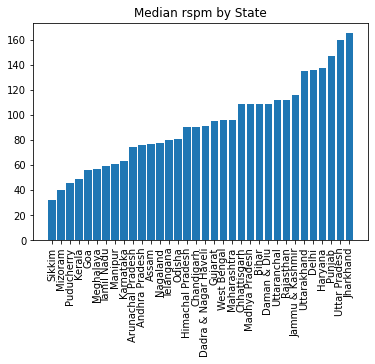

In [153]:
median_values('rspm')

### spm status

state
Sikkim                   75.00000
Manipur                 120.50000
Puducherry              191.00000
Goa                     199.00000
Daman & Diu             200.50000
Andhra Pradesh          220.78348
Meghalaya               220.78348
Mizoram                 220.78348
Nagaland                220.78348
Odisha                  220.78348
Punjab                  220.78348
Tamil Nadu              220.78348
Telangana               220.78348
Uttar Pradesh           220.78348
Uttarakhand             220.78348
Rajasthan               220.78348
Maharashtra             220.78348
Kerala                  220.78348
Karnataka               220.78348
Jharkhand               220.78348
Jammu & Kashmir         220.78348
Himachal Pradesh        220.78348
Haryana                 220.78348
Gujarat                 220.78348
Dadra & Nagar Haveli    220.78348
Chhattisgarh            220.78348
Chandigarh              220.78348
Bihar                   220.78348
Assam                   220.78348
Arunacha

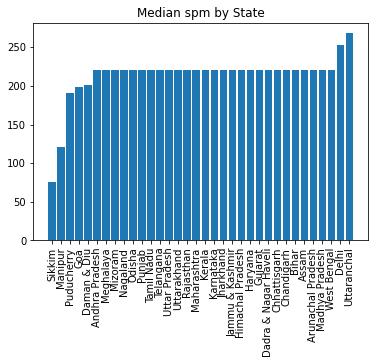

In [154]:
median_values('spm')

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [158]:
andra_pradesh = data.loc[data.state == 'Andhra Pradesh', ['year', 'no2', 'so2', 'rspm', 'spm']].groupby('year').median()
andra_pradesh.head()

KeyError: ignored

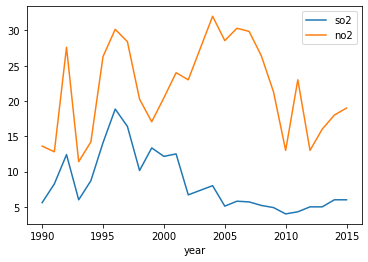

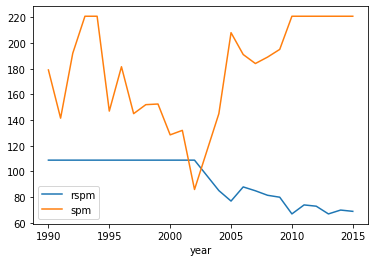

In [159]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

# ... Your code here

so2_no2 = pd.DataFrame({'so2': andra_pradesh.so2, 'no2': andra_pradesh.no2}, index=andra_pradesh.index)
so2_no2_plot = so2_no2.plot.line()

rspm_spm = pd.DataFrame({'rspm': andra_pradesh.rspm, 'spm': andra_pradesh.spm}, index=andra_pradesh.index)
rspm_spm_plot = rspm_spm.plot.line()

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



SO2 levels have been consistently lower than those of NO2 from 1990 to 2015 and have seen a decline since the mid '90s, without having reached those same levels since. NO2 levels have not ever gone below 10 and seem to be volatile with great fluctuation.

RSPM seems to have plateaued from 1990 to the early 2000s before declining and maintaining low levels since. SPM levels were somewhat volatile early on, with a sharp decline in the early 2000s before an even sharper increase. They are currently at their highest  historically at 220.